In [19]:
from PatriciaDatabase import PatriciaDatabase
from PatriciaTrie import PatriciaTrie
from PatriciaDatabaseTest import test

In [20]:
import hashlib
import random

Arguments to connectiong database

In [21]:
args = {
    'DB_NAME': "blockchain_postgresql", 
    #'DB_USER': "darkhannurlybay",
    #'DB_PASSWORD': "",
    #'DB_HOST': "localhost",
    'DB_PORT': "5432",
    'verbose': False
}

Run unit tests

In [22]:
test(args)


Seems like good!


Creating some users in our system

In [23]:
users = {}
#user = {    'Alice': '000010',    'Bob': '010100',    'Sally': '111111'}

In [24]:
number_of_users = 2

In [25]:
for i in range(number_of_users):
    users['user_'+str(i)] = hashlib.sha224(bytes(i)).hexdigest()

In [26]:
#Displaying users' list
for i in users.items():
    print(i)

('user_0', 'd14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f')
('user_1', 'fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073')


In [33]:
db = PatriciaDatabase(**args)
db.delete_tables()
db.create_tables()

In [ ]:
t = PatriciaTrie(db, simple_hash=False)

#creating users with initial balances i.e. 10 ** 6
amount = 10 ** 6
for i in users.items():
    
    tx_hash = hashlib.sha224(str(i[1] + str(amount)).encode('utf-8')).hexdigest()
    t.create(i[1],amount,tx_hash)

#t.create(user['Alice'], 100, '0000')
#t.create(user['Bob'], 50, '0001')

db.print_column_name('PatriciaNode');
for row in t.db.show_table('PatriciaNode'):
    print(row)
    
t.draw()

In [28]:
#assert t.get_balance(user['Alice']) == 100
#assert t.get_balance(user['Bob']) == 50

In [29]:
#t.spend(user['Alice'], user['Bob'], 10, '1000')
#assert t.get_balance(user['Alice']) == 90
#assert t.get_balance(user['Bob']) == 60
#t.draw()

In [30]:
#creating random transactions
transactions = 5
for i in range(transactions):
        sender = random.choice(list(users.values()))
        receiver = random.choice(list(i for i in users.values() if i not in sender))
        print(sender,' -> ',receiver)
        amount = random.randint(0, 100)
        transaction_string = str(sender + receiver + str(amount))
        tx_hash_balance = hashlib.sha224(transaction_string.encode('utf-8')).hexdigest()
        #t.spend(users[sender], users[receiver],amount , tx_hash_balance)
        t.spend(sender, receiver,amount , tx_hash_balance)
        
#t.draw()
transaction_string


d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f  ->  fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073
d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f  ->  fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073
fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073  ->  d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f
d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f  ->  fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073
d14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42f  ->  fff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b073


'd14a028c2a3a2bc9476102bb288234c415a2b01f828ea62ac5b3e42ffff9292b4201617bdc4d3053fce02734166a683d7d858a7f5f59b07346'

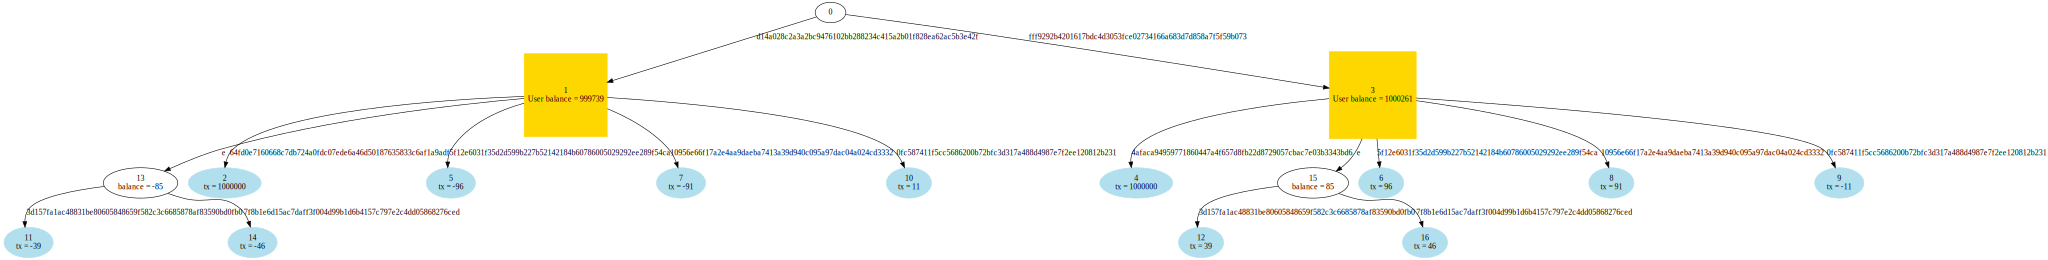

In [31]:
t.draw()

In [32]:
db.close_session()